/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Best solution (number of trees): 9
Classification error: 0.2915254237288136


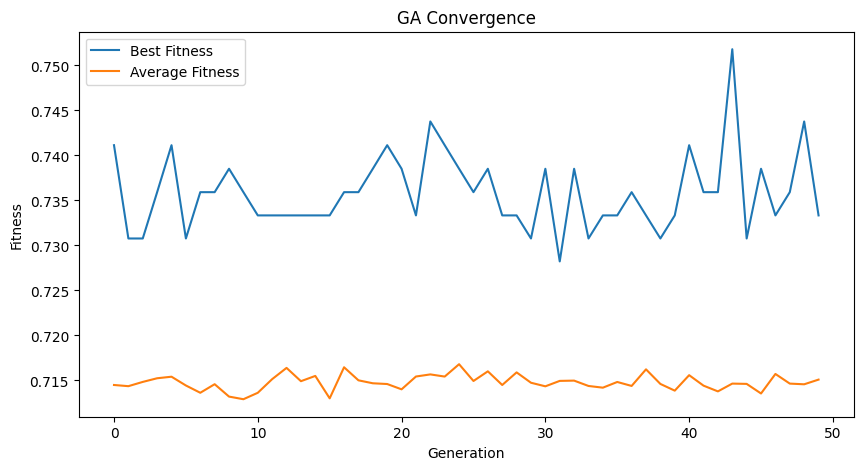

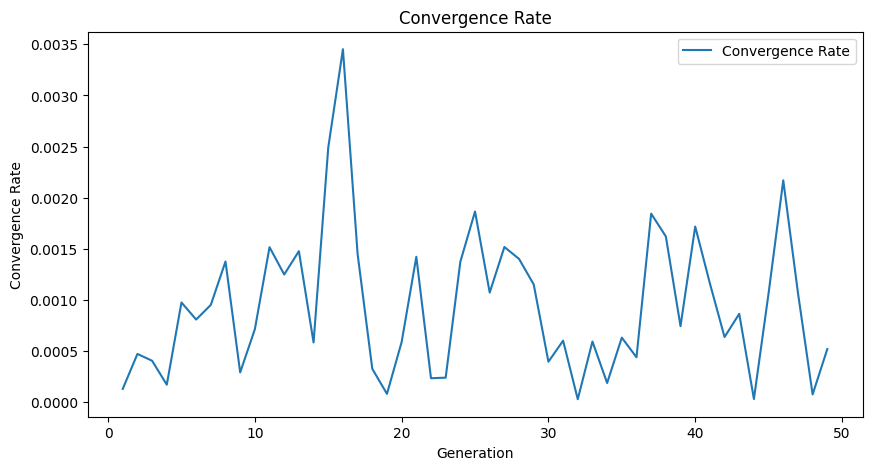

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Load data and split into training and testing sets
data = fetch_openml(name="titanic", version=1)
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.dropna(subset=['age', 'fare'])  # Remove rows with missing values

X = df[['age', 'fare']]
y = data.target[df.index]  # Select only rows that exist in X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initial GA parameters
population_size = 100
generations = 50
crossover_rate = 0.7
mutation_rate = 0.1

# Lists to store statistics
best_fitness_values = []
average_fitness_values = []
convergence_rates = []

# Fitness function (minimizing classification error)
def fitness_function(individual):
    clf = RandomForestClassifier(n_estimators=individual)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    error = 1 - accuracy
    fitness = 1 / (1 + error)
    return fitness

# Initialize the initial population
population = [random.randint(1, 100) for _ in range(population_size)]

for generation in range(generations):
    # Evaluate the fitness of each individual in the population
    fitness_scores = [fitness_function(individual) for individual in population]
    best_fitness = max(fitness_scores)
    average_fitness = np.mean(fitness_scores)

    best_fitness_values.append(best_fitness)
    average_fitness_values.append(average_fitness)

    # Calculate convergence rate
    if generation > 0:
        convergence_rate = abs(average_fitness_values[-1] - average_fitness_values[-2])
        convergence_rates.append(convergence_rate)

    # Select parents using roulette wheel selection
    selected_parents = random.choices(population, weights=fitness_scores, k=population_size)

    # Create a new population
    new_population = []

    while len(new_population) < population_size:
        parent1, parent2 = random.choices(selected_parents, k=2)

        if random.random() < crossover_rate:
            # Crossover (e.g., one-point crossover)
            crossover_point = random.randint(0, 1)  # Since we are using a single gene, crossover_point can be 0 or 1
            child = parent1 if crossover_point == 0 else parent2
        else:
            child = parent1  # No crossover

        if random.random() < mutation_rate:
            # Mutation (change one gene)
            child = random.randint(1, 100)

        new_population.append(child)

    population = new_population

# Find the best solution (number of trees)
best_solution = max(population, key=fitness_function)
best_fitness = fitness_function(best_solution)

print("Best solution (number of trees):", best_solution)
print("Classification error:", 1 - best_fitness)

# Plot the convergence of the GA
plt.figure(figsize=(10, 5))
plt.plot(range(generations), best_fitness_values, label='Best Fitness')
plt.plot(range(generations), average_fitness_values, label='Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.title('GA Convergence')
plt.show()

# Plot the convergence rate
plt.figure(figsize=(10, 5))
plt.plot(range(1, generations), convergence_rates, label='Convergence Rate')
plt.xlabel('Generation')
plt.ylabel('Convergence Rate')
plt.legend()
plt.title('Convergence Rate')
plt.show()